In [6]:
%%capture
%pip install statsmodels

Linear regression results:
                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     6.403
Date:                Tue, 18 Jul 2023   Prob (F-statistic):             0.0173
Time:                        22:10:25   Log-Likelihood:                -95.286
No. Observations:                  30   AIC:                             194.6
Df Residuals:                      28   BIC:                             197.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2653    

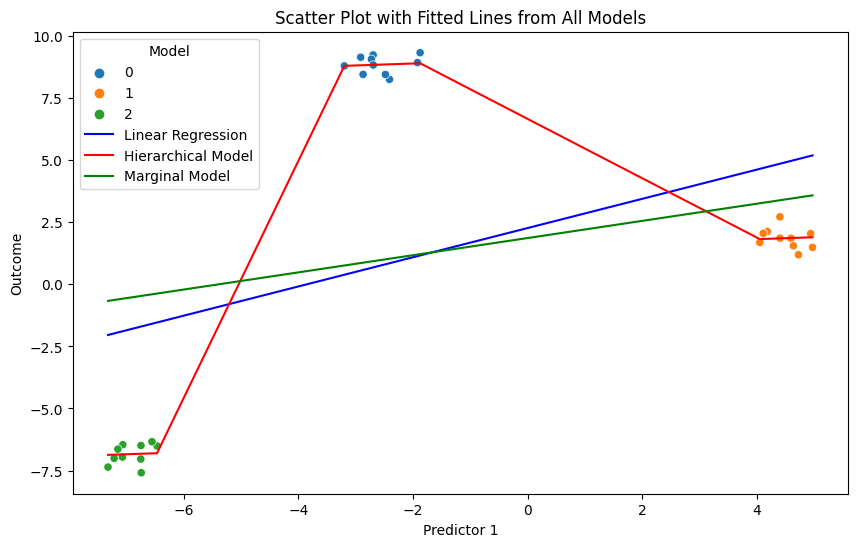

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.datasets import make_blobs

SEED = 42
np.random.seed(SEED)

features, clusters = make_blobs(n_samples = 30,
                  n_features = 2, 
                  centers = 3,
                  cluster_std = 0.4,
                  shuffle = True,
                  random_state=SEED
                  )

data = pd.DataFrame({'predictor1': features[:,0], 'outcome': features[:,1], 'cluster_id': clusters})

# Linear regression
linear_model = smf.ols("outcome ~ predictor1", data)
linear_result = linear_model.fit()

# HLM
hierarchical_model = smf.mixedlm("outcome ~ predictor1", data, groups=data['cluster_id'])
hierarchical_result = hierarchical_model.fit()

# Marginal model
marginal_model = smf.gee("outcome ~ predictor1", data['cluster_id'], data, cov_struct=sm.cov_struct.Exchangeable())
marginal_result = marginal_model.fit()

print("Linear regression results:")
print(linear_result.summary())

print("\nHLM results:")
print(hierarchical_result.summary())

print("\nMarginal model results:")
print(marginal_result.summary())

plt.figure(figsize=(10, 6))
sns.scatterplot(x='predictor1', y='outcome', data=data, hue='cluster_id', palette='tab10')
sns.lineplot(x='predictor1', y=linear_result.fittedvalues, data=data, color='blue', label='Linear Regression')
sns.lineplot(x='predictor1', y=hierarchical_result.fittedvalues, data=data, color='red', label='Hierarchical Model')
sns.lineplot(x='predictor1', y=marginal_result.fittedvalues, data=data, color='green', label='Marginal Model')
plt.title('Scatter Plot with Fitted Lines from All Models')
plt.xlabel('Predictor 1')
plt.ylabel('Outcome')
plt.legend(title='Model')
plt.show()